<a href="https://colab.research.google.com/github/ArifAygun/Applied-Machine-Learning-Ensemble-Learning/blob/main/AA_Applied_ML_Ensemble_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Prepare Data: Read in the data

Using the Titanic dataset from [this](https://www.kaggle.com/c/titanic/overview) Kaggle competition (we are only using the training set).

This dataset contains information about 891 people who were on board the ship when departed on April 15th, 1912. As noted in the description on Kaggle's website, some people aboard the ship were more likely to survive the wreck than others. There were not enough lifeboats for everybody so women, children, and the upper-class were prioritized. Using the information about these 891 passengers, the challenge is to build a model to predict which people would survive based on the following fields:

- **Name** (str) - Name of the passenger
- **Pclass** (int) - Ticket class
- **Sex** (str) - Sex of the passenger
- **Age** (float) - Age in years
- **SibSp** (int) - Number of siblings and spouses aboard
- **Parch** (int) - Number of parents and children aboard
- **Ticket** (str) - Ticket number
- **Fare** (float) - Passenger fare
- **Cabin** (str) - Cabin number
- **Embarked** (str) - Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

### Read in Data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

from google.colab import drive
drive.mount('/content/drive/')

%cd /content/drive/My Drive/Linkedin/Applied_ML_Ensemble_Learning/

titanic = pd.read_csv('titanic.csv')
titanic.head(20)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/Linkedin/Applied_ML_Ensemble_Learning


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Clean continuous variables

#### Fill missing for `Age`

In [2]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)

In [4]:
titanic.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


#### Combine `SibSp` & `Parch`

<Figure size 640x480 with 0 Axes>

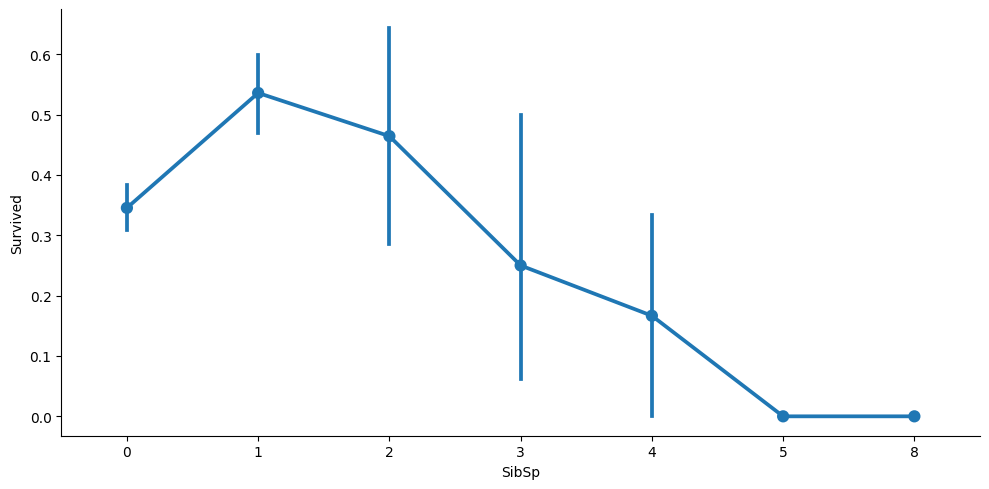

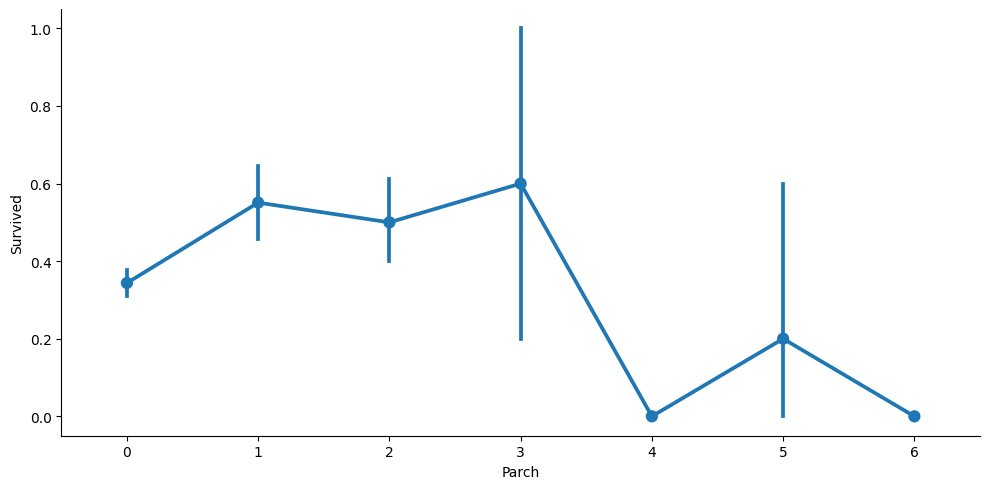

In [5]:
for i, col in enumerate(['SibSp', 'Parch']):
    plt.figure(i)
    sns.catplot(x=col, y='Survived', data=titanic, kind='point', aspect=2, )

In [6]:
titanic['Family_cnt'] = titanic['SibSp'] + titanic['Parch']

#### Drop unnnecessary variables

In [7]:
titanic.drop(['PassengerId', 'Parch', 'SibSp'], axis=1, inplace=True)

In [8]:
titanic.head(20)

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_cnt
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0
5,0,3,"Moran, Mr. James",male,28.0,330877,8.4583,NaN,Q,0
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,17463,51.8625,E46,S,0
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,349909,21.0750,NaN,S,4
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,347742,11.1333,NaN,S,2
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,237736,30.0708,NaN,C,1


### Clean categorical variables

#### Fill in missing & create indicator for `Cabin`

In [9]:
titanic.isnull().sum()

Survived        0
Pclass          0
Name            0
Sex             0
Age             0
Ticket          0
Fare            0
Cabin         687
Embarked        2
Family_cnt      0
dtype: int64

In [10]:
titanic.groupby(titanic['Cabin'].isnull())['Survived'].mean()

Cabin
False    0.666667
True     0.299854
Name: Survived, dtype: float64

In [11]:
titanic['Cabin_ind'] = np.where(titanic['Cabin'].isnull(), 0, 1)

In [12]:
titanic.head(20)

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_cnt,Cabin_ind
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1,1
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0,0
5,0,3,"Moran, Mr. James",male,28.0,330877,8.4583,NaN,Q,0,0
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,17463,51.8625,E46,S,0,1
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,349909,21.0750,NaN,S,4,0
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,347742,11.1333,NaN,S,2,0
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,237736,30.0708,NaN,C,1,0


#### Convert `Sex` to numeric

In [13]:
gender_num = {'male': 0, 'female': 1}

titanic['Sex'].map(gender_num)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

#### Drop unnecessary variables

In [14]:
titanic.drop(['Cabin', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [15]:
titanic.head(20)

,Survived,Pclass,Sex,Age,Fare,Family_cnt,Cabin_ind
0,0,3,male,22.0,7.2500,1,0
1,1,1,female,38.0,71.2833,1,1
2,1,3,female,26.0,7.9250,0,0
3,1,1,female,35.0,53.1000,1,1
4,0,3,male,35.0,8.0500,0,0
5,0,3,male,28.0,8.4583,0,0
6,0,1,male,54.0,51.8625,0,1
7,0,3,male,2.0,21.0750,4,0
8,1,3,female,27.0,11.1333,2,0
9,1,2,female,14.0,30.0708,1,0


### Write out cleaned data

In [16]:
titanic.to_csv('/content/drive//My Drive/Linkedin/Applied_ML_Ensemble_Learning/AA/titanic_cleaned.csv')

## Prepare Data: Split data into train, validation, and test set

Using the Titanic dataset from [this](https://www.kaggle.com/c/titanic/overview) Kaggle competition (we are only using the training set).

In this section, we will split the data into train, validation, and test set in preparation for fitting a basic model in the next section.

### Read in Data

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split

titanic = pd.read_csv('/content/drive/My Drive/Linkedin/Applied_ML_Ensemble_Learning/AA/titanic_cleaned.csv')
titanic.head(11)

,Unnamed: 0,Survived,Pclass,Sex,Age,Fare,Family_cnt,Cabin_ind
0,0,0,3,male,22.0,7.2500,1,0
1,1,1,1,female,38.0,71.2833,1,1
2,2,1,3,female,26.0,7.9250,0,0
3,3,1,1,female,35.0,53.1000,1,1
4,4,0,3,male,35.0,8.0500,0,0
5,5,0,3,male,28.0,8.4583,0,0
6,6,0,1,male,54.0,51.8625,0,1
7,7,0,3,male,2.0,21.0750,4,0
8,8,1,3,female,27.0,11.1333,2,0
9,9,1,2,female,14.0,30.0708,1,0


### Split into train, validation, and test set

In [18]:
features = titanic.drop('Survived', axis=1)
labels = titanic['Survived']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=42)
X_val, X_test, y_train, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [19]:
for dataset in [y_train, y_val, y_test]:
  print(round(len(dataset) / len(labels), 2))

0.2
0.2
0.4


### Write out all data

In [20]:
X_train.to_csv('/content/drive/My Drive/Linkedin/Applied_ML_Ensemble_Learning/AA/train_features.csv', index=False)
X_val.to_csv('/content/drive/My Drive/Linkedin/Applied_ML_Ensemble_Learning/AA/val_features.csv', index=False)
X_test.to_csv('/content/drive/My Drive/Linkedin/Applied_ML_Ensemble_Learning/AA/test_features.csv', index=False)

y_train.to_csv('/content/drive/My Drive/Linkedin/Applied_ML_Ensemble_Learning/AA/train_labels.csv', index=False)
y_val.to_csv('/content/drive/My Drive/Linkedin/Applied_ML_Ensemble_Learning/AA/val_labels.csv', index=False)
y_test.to_csv('/content/drive/My Drive/Linkedin/Applied_ML_Ensemble_Learning/AA/test_labels.csv', index=False)

## Boosting: Explore boosting algorithms in Python

Import [`GradientBoostingClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) and [`AdaBoostClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html) from `sklearn` and explore the hyperparameters.

### Import Boosting Algorithm for Classification

In [21]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier

GradientBoostingClassifier().get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [22]:
AdaBoostClassifier().get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': 'deprecated',
 'estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

## Boosting: Implement a boosting model

Using the Titanic dataset from [this](https://www.kaggle.com/c/titanic/overview) Kaggle competition.

In this section, we will fit and evaluate a simple Gradient Boosting model.

### Read in Data

In [31]:
import joblib
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

tr_features = pd.read_csv('/content/drive/My Drive/Linkedin/Applied_ML_Ensemble_Learning/AA/train_features.csv')
tr_labels = pd.read_csv('/content/drive/My Drive/Linkedin/Applied_ML_Ensemble_Learning/AA/train_labels.csv')

### Hyperparameter tuning

In [32]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [33]:
gb = GradientBoostingClassifier()
parameters = {
    'n_estimators': [5, 50, 250, 500],
    'max_depth': [1, 3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 1, 10, 100]
}

cv = GridSearchCV(gb, parameters, cv=5)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}

0.624 (+/-0.007) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}
0.796 (+/-0.115) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
0.796 (+/-0.115) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}
0.811 (+/-0.117) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}
0.624 (+/-0.007) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5}
0.811 (+/-0.069) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.824 (+/-0.086) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
0.826 (+/-0.079) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
0.624 (+/-0.007) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 5}
0.811 (+/-0.049) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
0.822 (+/-0.059) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 250}
0.816 (+/-0.042) for {'learning_

In [34]:
cv.best_estimator_

GradientBoostingClassifier(learning_rate=0.01, n_estimators=500)

### Write out pickled model

In [36]:
joblib.dump(cv.best_estimator_, '/content/drive/My Drive/Linkedin/Applied_ML_Ensemble_Learning/models/GB_model.pkl')

['/content/drive/My Drive/Linkedin/Applied_ML_Ensemble_Learning/models/GB_model.pkl']